In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# 1. Carga de datos
route = 'res' + os.sep + 'estaciones_bici.csv'
bicis = pd.read_csv(route, sep = ';', index_col= 0, engine= "python")

bicis.head()
bicis = bicis[['station', 'total', 'download_date', 'available']]

display(bicis.head())
display(bicis.tail())
display(bicis.dtypes)

,station,total,download_date,available
0,64,20,2019-02-10 17:25:37.787,9
1,73,20,2019-02-10 17:25:37.787,6
2,63,20,2019-02-10 18:13:39.827,20
3,64,20,2019-02-10 18:13:39.827,6
4,65,19,2019-02-10 18:13:39.827,9


,station,total,download_date,available
27542,260,20,2019-02-11 23:44:00.786,0
27543,261,19,2019-02-11 23:44:00.786,15
27544,268,10,2019-02-11 23:44:00.786,1
27545,269,15,2019-02-11 23:44:00.786,1
27546,276,20,2019-02-11 23:44:00.786,8


station           int64
total             int64
download_date    object
available         int64
dtype: object

In [2]:
# 2. Obtención del número de estaciones que tienen 30 bornetas disponibles
bornetas_disponibles = bicis[bicis['total'] == 30].groupby(['station'])
print(f'estaciones que tienen 30 bornetas disponibles: {len(bornetas_disponibles)}')

estaciones que tienen 30 bornetas disponibles: 11


In [3]:
# 3. Número de estación con la media más alta de bicis disponibles
station = set(bicis['station'])
medias = []
for element in station:
    medias.append([element, bicis[bicis['station'] == element]['available'].mean()])

medias_data = pd.DataFrame(medias, columns=['station', 'media bicis disponibles'])
display(medias_data.head())

estacion = medias_data[medias_data['media bicis disponibles'] == medias_data['media bicis disponibles'].max()]
print(f'Estación con más media de bicis disponibles: {estacion.iloc[0]["station"]}')
print(f'Promedio de bicis disponible: {estacion.iloc[0]["media bicis disponibles"]}')

,station,media bicis disponibles
0,1,12.04
1,2,2.07
2,3,3.30
3,4,3.10
4,5,8.73


Estación con más media de bicis disponibles: 50.0
Promedio de bicis disponible: 31.26


,available,station
0,26,2
1,27,21
2,28,12
3,29,4
4,30,2
5,31,5
6,32,14
7,33,18
8,34,9
9,35,2


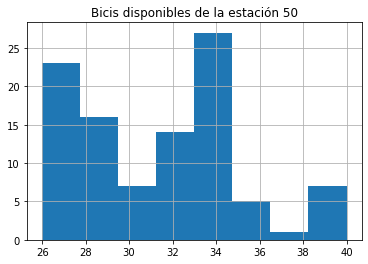

In [4]:
# 4. Realizar el histograma de bicis disponibles de la estación del punto anterior
estaciones = bicis[bicis['station'] == 50].reset_index()
estaciones = estaciones[['station', 'available']]
display(estaciones.groupby('available').count().reset_index())
_ = estaciones.hist(bins=8, column='available')
plt.title('Bicis disponibles de la estación 50')
plt.show()

,download_date,available
0,2019-02-10 18:13:39.827,39
1,2019-02-10 18:29:13.135,36
2,2019-02-10 18:44:43.728,33
3,2019-02-10 19:00:14.475,31
4,2019-02-10 19:15:48.800,33


Text(0.5, 1.0, 'Bicis disponibles en la estación 50 por hora')

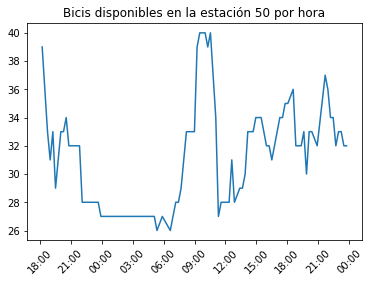

In [5]:
# 5. Realizar gráfica con la línea temporal de bicis disponibles de la estación del punto anterior. 
# Pista, es necesario cambiar el índice a uno tipo fecha
estaciones_fecha = bicis[bicis['station'] == 50].reset_index()
estaciones_fecha = estaciones_fecha[['download_date', 'available']]
estaciones_fecha['download_date'] = pd.to_datetime(estaciones_fecha['download_date'], format='%Y%m%d %H:%M:%S')
display(estaciones_fecha.head())

fig, ax = plt.subplots()
ax.plot(estaciones_fecha["download_date"], estaciones_fecha["available"])
formatter = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.set_title('Bicis disponibles en la estación 50 por hora')